## <font color='mediumseagreen'>Import các thư viện cần thiết</font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# path = '/content/drive/My Drive/Colab Notebooks/fake_job_postings.csv'
# df = pd.read_csv(path)

In [6]:
path = '/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv'
df = pd.read_csv(path)

## <font color='mediumseagreen'>Kiểm tra thông tin cơ bản của dataset và tiền xử lý</font>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.shape

(17880, 18)

In [9]:
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [10]:
df.columns[df.isnull().any()]

Index(['location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

In [11]:
df.isna().sum()[df.isna().sum() > 0]

location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
dtype: int64

In [12]:
corr_matrix = df[["telecommuting", "has_company_logo", "has_questions", "fraudulent"]].corr()

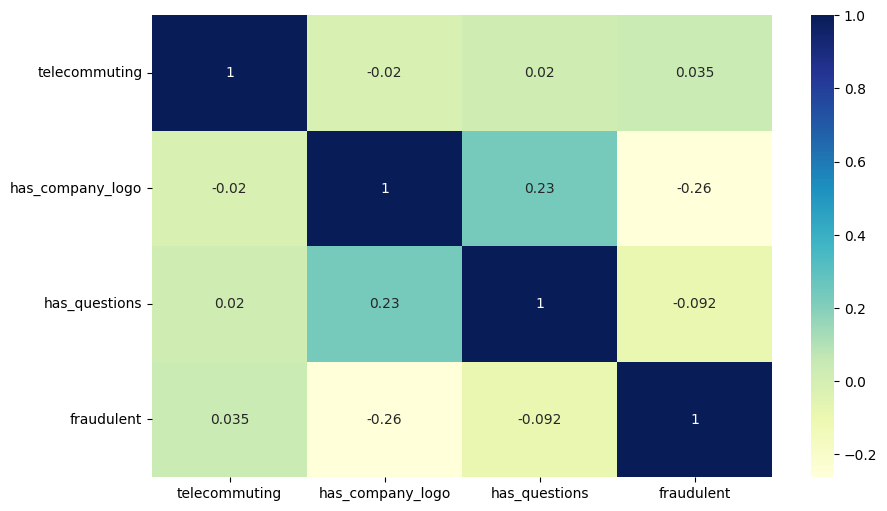

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [14]:
# Drop unnecessary columns.
df.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 
         'employment_type', 'industry', 'function'], axis=1, inplace=True)

# Fill missing values
df.fillna('', inplace=True)

In [15]:
df.shape

(17880, 11)

In [16]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
has_questions          0
required_experience    0
required_education     0
fraudulent             0
dtype: int64

In [17]:
df.duplicated().value_counts()

False    17559
True       321
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().value_counts()

False    17559
dtype: int64

In [20]:
df.fraudulent.value_counts(normalize=True)

0    0.951307
1    0.048693
Name: fraudulent, dtype: float64

In [21]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'has_questions', 'required_experience',
       'required_education', 'fraudulent'],
      dtype='object')

In [22]:
data = pd.DataFrame()

In [23]:
data['all_text'] = df['title'] = df['location'] + df['company_profile'] + df['description'] 
+ df['requirements']  + df['benefits'] + df['required_experience'] + df['required_education']

0        Experience with content management systems a m...
1        What we expect from you:Your key responsibilit...
2        Implement pre-commissioning and commissioning ...
3        EDUCATION: Bachelor’s or Master’s in GIS, busi...
4        QUALIFICATIONS:RN license in the State of Texa...
                               ...                        
17875    To ace this role you:Will eat comprehensive St...
17876    - B.A. or B.S. in Accounting- Desire to have f...
17877    At least 12 years professional experience.Abil...
17878    1. Must be fluent in the latest versions of Co...
17879    We want to hear from you if:You have an in-dep...
Length: 17559, dtype: object

In [24]:
data['fraudulent'] = df['fraudulent']

In [25]:
data

,all_text,fraudulent
0,"US, NY, New YorkWe're Food52, and we've create...",0
1,"NZ, , Auckland90 Seconds, the worlds Cloud Vid...",0
2,"US, IA, WeverValor Services provides Workforce...",0
3,"US, DC, WashingtonOur passion for improving qu...",0
4,"US, FL, Fort WorthSpotSource Solutions LLC is ...",0
...,...,...
17875,"CA, ON, TorontoVend is looking for some awesom...",0
17876,"US, PA, PhiladelphiaWebLinc is the e-commerce ...",0
17877,"US, TX, HoustonWe Provide Full Time Permanent ...",0
17878,"NG, LA, LagosNemsia Studios is looking for an ...",0


In [26]:
# pip install spacy

## <font color='mediumseagreen'>Xử lý mất cân bằng</font>

In [27]:
df.fraudulent.value_counts(normalize=True)

0    0.951307
1    0.048693
Name: fraudulent, dtype: float64

<AxesSubplot: ylabel='fraudulent'>

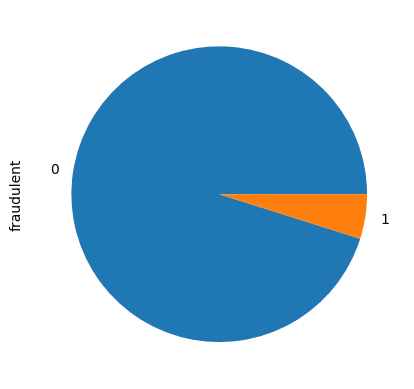

In [28]:
df.fraudulent.value_counts(normalize=True).plot(kind='pie')

In [29]:
real_post = data[data['fraudulent']==0]

In [30]:
real_post = real_post.sample(n=2000)
real_post_idx = real_post.index.tolist()
real_post_idx[0:10]

[12544, 9369, 7091, 6343, 16684, 13486, 4179, 8461, 14184, 16988]

In [31]:
all_idx = list(range(1, 17781)) # Define all possible index values to sample
avail_idx = list(set(all_idx) - set(real_post_idx))  # Remove values from lst

In [32]:
avail_idx[1000:1011]

[1127, 1128, 1129, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139]

In [33]:
import random
val_idx = random.sample(avail_idx, 50)
val_idx[0:10]

[8009, 12179, 13189, 11692, 14464, 13064, 5301, 9471, 13691, 13593]

In [34]:
real_post.shape

(2000, 2)

In [35]:
fake_post = data[data['fraudulent']==1]

In [36]:
balanced_data = pd.concat([real_post,fake_post], axis=0)

In [37]:
# Shuffle all rows
balanced_data = balanced_data.sample(frac=1)
balanced_data

,all_text,fraudulent
13509,"US, IN, FishersBluebridge was created by a tea...",0
17772,"AU, QLD, Gold coastInternational media company...",1
9418,"US, PA, PhiladelphiaNovitex Enterprise Solutio...",0
7802,"US, WA, SeattleMust have 5+ years experience i...",0
4745,"US, FL, TamaracSenior Nannies Home Care Servic...",0
...,...,...
5212,"US, NC, CharlotteCompensation AnalystLocation:...",0
11070,"US, CA, San FranciscoNovitex Enterprise Soluti...",0
6051,"US, TN, NashvilleBallparc is a venture-backed ...",0
6761,"DE, BY, MunichCloudreach are the only top tier...",0


## <font color='mediumseagreen'>Import các thư viện làm việc với NLP</font>

In [38]:
import string
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
# pip install -U pip setuptools wheel

In [40]:
# pip install -U spacy

In [41]:
# !python -m spacy download en_core_web_sm

In [42]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
stop_words = STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    tokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc]

    # Removing stop words and punctuations
    tokens = [word for word in tokens if word not in punctuations and word not in stop_words]

    # Return preprocessed list of tokens
    return tokens

# Custom cleaning class
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [43]:
# return token counts matrix
# where rows represent documents from the corpus (documents collection), 
# and columns represent the occurrences (frequency) of the tokens in those documents.
# `spacy_tokenizer` is a tokenizer from the `spaCy` library

In [44]:
balanced_data['all_text'] = balanced_data['all_text'].apply(clean_text)

In [45]:
balanced_data['all_text'].head(2)

13509    us, in, fishersbluebridge was created by a tea...
17772    au, qld, gold coastinternational media company...
Name: all_text, dtype: object

In [46]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2), min_df=1)
bow_vector

CountVectorizer(ngram_range=(1, 2),
                tokenizer=<function spacy_tokenizer at 0x7df07e84d510>)

## <font color='mediumseagreen'>Xây dựng các mô hình học máy</font>

In [47]:
# Kfold 
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
# ML Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Pipeline
from sklearn.pipeline import Pipeline
# Split data
from sklearn.model_selection import train_test_split
# Plot ROC-AUC curves
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay, roc_curve

##### <font color='mediumseagreen'>Chia train, test</font>

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(balanced_data.all_text, balanced_data.fraudulent, test_size=0.2)

In [50]:
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (2284,)
Test size: (571,)


In [51]:
pd.options.mode.chained_assignment = None

# Define X and y variables
X = balanced_data['all_text']
y = balanced_data['fraudulent']

# Define classifiers and pipelines
classifiers = {'Naive Bayes': MultinomialNB(class_prior=None, fit_prior=True),
               'Random Forest': RandomForestClassifier(class_weight='balanced'),
               'Logistic Regression': LogisticRegression(class_weight='balanced')
              }

pipelines = {'Naive Bayes': Pipeline([('cleaner', predictors()),
                                       ('vectorizer', bow_vector),
                                       ('classifier', classifiers['Naive Bayes'])
                                       ]),
             'Random Forest': Pipeline([('cleaner', predictors()),
                                         ('vectorizer', bow_vector),
                                         ('classifier', classifiers['Random Forest'])
                                         ]),
             'Logistic Regression': Pipeline([('cleaner', predictors()),
                                               ('vectorizer', CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                                               ('classifier', classifiers['Logistic Regression'])
                                               ])
             }

# Define the StratifiedKFold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle = True)

# Define the metrics to evaluate models
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Create a dataframe to store the macrometrics of each model
models = ['Naive Bayes', 'Random Forest', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

df_KF = pd.DataFrame(0, index=models, columns=metrics)

# Compute the metrics for each model and store them in the dataframe
for name, pipe in pipelines.items():
    scores = cross_validate(pipe, X, y, cv=cv, scoring=scoring, return_train_score=False)
    df_KF['Accuracy'][name] = np.mean(scores['test_accuracy'])
    df_KF['Precision'][name] = np.mean(scores['test_precision_macro'])
    df_KF['Recall'][name] = np.mean(scores['test_recall_macro'])
    df_KF['F1-score'][name] = np.mean(scores['test_f1_macro'])

df_KF = df_KF.reset_index()
# rename the columns
df_KF = df_KF.rename(columns={'index': 'Model name'})
# Print the dataframe with the results
print(df_KF)


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extr

            Model name  Accuracy  Precision    Recall  F1-score
0          Naive Bayes  0.926795   0.939733  0.886148  0.907368
1        Random Forest  0.916287   0.908866  0.889026  0.897543
2  Logistic Regression  0.745709   0.704787  0.723418  0.710985


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Naive Bayes: Accuracy=0.91, Precision=0.94, Recall=0.89, F1-score=0.91
AUC: 0.98


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Random Forest: Accuracy=0.89, Precision=0.90, Recall=0.88, F1-score=0.89
AUC: 0.97


/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Logistic Regression: Accuracy=0.90, Precision=0.89, Recall=0.90, F1-score=0.90
AUC: 0.97


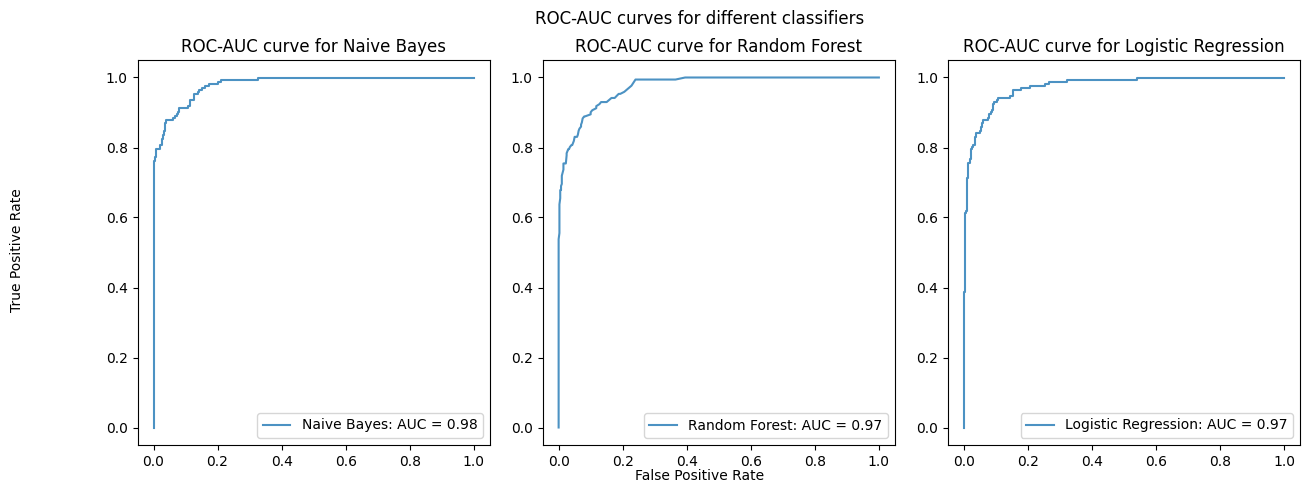

            Model name  Accuracy  Precision  Recall  F1-score   AUC
0          Naive Bayes      0.91       0.94    0.89      0.91  0.98
1        Random Forest      0.89       0.90    0.88      0.89  0.97
2  Logistic Regression      0.90       0.89    0.90      0.90  0.97


In [52]:
pd.options.mode.chained_assignment = None

# Define X and y variables
X = balanced_data['all_text']
y = balanced_data['fraudulent']

# Define classifiers and pipelines
classifiers = {'Naive Bayes': MultinomialNB(),
                'Random Forest': RandomForestClassifier(class_weight='balanced'),
                'Logistic Regression': LogisticRegression(class_weight='balanced')
               }

# Initialize the dataframe to store the macro metrics of each model
models = ['Naive Bayes', 'Random Forest', 'Logistic Regression']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']

df_1F = pd.DataFrame(0, index=models, columns=metrics)

# Define the figure and subplots using the subplots() function
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Customize the spacing between subplots
fig.subplots_adjust(wspace=0.15)

# for name, classifier in classifiers.items():
for i, (name, classifier) in enumerate(classifiers.items()):
    
    # Define pipeline using Bag of Words
    pipeline = Pipeline([
        ("cleaner", predictors()),
        ("vectorizer", bow_vector),
        ('classifier', classifier)])
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
    # Fit the model on training data and get the predicted labels on test data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Compute the macro metrics of each model using classification_report
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['macro avg']['f1-score']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']

    # Store the macro metrics of each model into the dataframe
    df_1F['Accuracy'][name] = round(accuracy, 2)
    df_1F['Precision'][name] = round(precision, 2)
    df_1F['Recall'][name] = round(recall, 2)
    df_1F['F1-score'][name] = round(f1_score, 2)

    # Print the evaluation result
    print(f'{name}: Accuracy={accuracy:.2f}, Precision={precision:.2f}, Recall={recall:.2f}, F1-score={f1_score:.2f}')
    
    # Compute AUC-ROC
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f'AUC: {roc_auc:.2f}')
    df_1F['AUC'][name] = round(roc_auc, 2)
    
    # Plot ROC curve on the corresponding subplot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    axs[i].plot(fpr, tpr, label=f'{name}: AUC = {roc_auc:.2f}', alpha=0.8)
    axs[i].set_title(f'ROC-AUC curve for {name}')
    axs[i].legend(loc="lower right")

# Add labels and title to the plot
fig.text(0.5, 0.04, "False Positive Rate", ha="center")
fig.text(0.04, 0.5, "True Positive Rate", va="center", rotation="vertical")
fig.suptitle("ROC-AUC curves for different classifiers")
plt.show()

df_1F = df_1F.reset_index()
# rename the columns
df_1F = df_1F.rename(columns={'index': 'Model name', 'Accuracy': 'Accuracy', 'Precision': 'Precision', 'Recall': 'Recall', 'F1-score': 'F1-score'})
df_1F
print(df_1F)


In [53]:
difference = pd.DataFrame(df_KF['Model name'])

In [54]:
difference

,Model name
0,Naive Bayes
1,Random Forest
2,Logistic Regression


In [55]:
difference["Dif_Accuracy"] = abs(df_KF["Accuracy"] - df_1F["Accuracy"])
difference["Dif_Precision"] = abs(df_KF["Precision"] - df_1F["Precision"])
difference["Dif_Recall"] = abs(df_KF["Recall"] - df_1F["Recall"])
difference["Dif_F1-score"] = abs(df_KF["F1-score"] - df_1F["F1-score"])

In [56]:
difference

,Model name,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
0,Naive Bayes,0.016795,0.000267,0.003852,0.002632
1,Random Forest,0.026287,0.008866,0.009026,0.007543
2,Logistic Regression,0.154291,0.185213,0.176582,0.189015


In [57]:
def format_value(val):
    condition = (val > 0.10) 
    font_color = 'red' if condition else 'black'
    font_weight = 'bold' if condition else 'normal'
    return 'color: {}; font-weight: {}'.format(font_color, font_weight)
difference.style.applymap(format_value, subset=["Dif_Accuracy", "Dif_Precision", "Dif_Recall", "Dif_F1-score"])

,Model name,Dif_Accuracy,Dif_Precision,Dif_Recall,Dif_F1-score
0,Naive Bayes,0.016795,0.000267,0.003852,0.002632
1,Random Forest,0.026287,0.008866,0.009026,0.007543
2,Logistic Regression,0.154291,0.185213,0.176582,0.189015


### <font color='mediumseagreen'>Sử dụng mô hình tốt nhất để dự đoán</font>

In [58]:
data['all_text'] = data['all_text'].apply(clean_text)

In [59]:
data

,all_text,fraudulent
0,"us, ny, new yorkwe're food52, and we've create...",0
1,"nz, , auckland90 seconds, the worlds cloud vid...",0
2,"us, ia, wevervalor services provides workforce...",0
3,"us, dc, washingtonour passion for improving qu...",0
4,"us, fl, fort worthspotsource solutions llc is ...",0
...,...,...
17875,"ca, on, torontovend is looking for some awesom...",0
17876,"us, pa, philadelphiaweblinc is the e-commerce ...",0
17877,"us, tx, houstonwe provide full time permanent ...",0
17878,"ng, la, lagosnemsia studios is looking for an ...",0


In [60]:
X_train, X_test, y_train, y_test = train_test_split(balanced_data.all_text, balanced_data.fraudulent, test_size=0.2)
clf = MultinomialNB()

# Create pipeline using Bag of Words
pipe_NB = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', clf)])

# fitting our model.
pipe_NB.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7df07c82e4a0>),
                ('vectorizer',
                 CountVectorizer(ngram_range=(1, 2),
                                 tokenizer=<function spacy_tokenizer at 0x7df07e84d510>)),
                ('classifier', MultinomialNB())])

In [61]:
x_val = data.loc[val_idx, 'all_text']
y_val = data.loc[val_idx, 'fraudulent']
y_pred_val = pipe_NB.predict(x_val)
from sklearn.metrics import classification_report
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        49
           1       0.50      1.00      0.67         1

    accuracy                           0.98        50
   macro avg       0.75      0.99      0.83        50
weighted avg       0.99      0.98      0.98        50

